<!--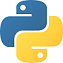 -->
# 11 Trees 



## Plan for the lecture 

1. Recap on Binary Trees (from Heaps)

2. Non-Binary Trees

3. Introduction to Binary Search Trees (BSTs)

4. Typical Tree Operations

![heapify](https://miro.medium.com/v2/resize:fit:1266/format:webp/1*IJDDOZOsFGLpf445qo1XKw.png)


# Tree terminology:
 
Think of the underground root structure of a natural tree:

<img src="https://embarkservices.com/wp-content/uploads/2015/02/Tree-Roots.jpg" alt="natural_tree" width="650"> 


The following terms are also adopted to describe the arrangement of data within a tree structure:

* <b>Root</b> - The starting node of the tree

* <b>Leaf</b> - The lowest level of a tree, which has no descendents

* <b>Child</b> - A descendent of a parent node. 

In a Binary Search Tree (BST) each parent can only have two children: a right child and left child. For effective Binary Search, the left child must always have a smaller integer value than the parent, and the right child must always have a greater value than the parent. 


![Treesgif](http://www.thecrazyprogrammer.com/wp-content/uploads/2017/08/Tree-Data-Structure.gif)

## Trees cannot contain cycles 

* Connections between nodes on the same level would transform this structure from a tree into a graph!

<img src="https://cdn.prod.website-files.com/5d0dc87aac109e1ffdbe379c/66f44872ef89ed6e1c47b6c1_60e1996404d4f874d58c7d3d_jd.png" alt="graph cycles" width="350"> 

* Graphs can contain cycles (like a ring road, or the M25), but it is wise to detect them before running path finding algorithms. 

![graph_vs_tree](https://www.gatevidyalay.com/wp-content/uploads/2018/07/Tree-Data-Structure-Example.png?ezimgfmt=rs:370x175/rscb1/ngcb1/notWebP)

## Contrast with a Linked List

* The Linked List is chain of nodes on the same level. 

* There isn't the same branching (optionality) as there is in trees.

<img src="https://miro.medium.com/v2/resize:fit:1400/0*WvZvIY4C0lKE04Z_.gif" alt="natural_tree" width="650"> 




## Let's start by representing a Binary Tree with a referenced structure

In [2]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [3]:
class BinaryTree:
    def __init__(self, root):
        self.root = TreeNode(root)

In [4]:
bt = BinaryTree(1)
bt.root.left = TreeNode(2)
bt.root.right = TreeNode(3)


In [5]:
print(bt.root.value)
print(bt.root.left.value)
print(bt.root.right.value)

1
2
3


```
        1
      /   \
     2     3
```

In [6]:
print("    ",bt.root.value)
print("    / \ ")
print("  ", bt.root.left.value, " ", bt.root.right.value )

     1
    / \ 
   2   3


## Or bring back your heap array representation:

* root of tree = first element (i = 0) 

* parent(i) = `floor(i-1)/2`

* left(i) = `(2 * i) + 1`

* right(i) = `(2 * i) + 2`

In [7]:
l = [1, 2, 3]
l

[1, 2, 3]

In [8]:
print("    ",l[0])
print("    / \ ")
print("  ", l[1], " ", l[2] )

     1
    / \ 
   2   3


In [9]:
arr = [8, 4, 6, 23, 12, 18, 17]
arr

[8, 4, 6, 23, 12, 18, 17]

As a Binary Tree: 

```
        8
      /   \
    4      6
  /  \    /  \
23   12  18  17  
```

## Alternatives - `binarytree`

* Thankfully, there is a package that can draw a tree for us! Phew...

`pip install binarytree`

`python3 -m pip install -U binarytree --user`

In [10]:
from binarytree import Node, build, bst

root = Node(10)
root.left = Node(5)
root.right = Node(15)

print(root)


  10
 /  \
5    15



In [11]:
root = Node(10)

node_a = Node(5)
node_b = Node(15)

root.left = node_a
root.right = node_b

node_a.left = Node(1)
node_a.right = Node(2)

node_b.left = Node(12)
node_b.right = Node(25)

print(root)


    __10___
   /       \
  5        _15
 / \      /   \
1   2    12    25



In [29]:
random_bst = bst(height=3)
print(random_bst)


    ____12
   /      \
  3__      13
 /   \       \
0     8       14
     /
    5



## Visualisation with `networkx`

* Graphical plotting of graph networks.

* Does work better for graphs I think, but with some manual adjustment you can draw trees here

`pip install networkx matplotlib`

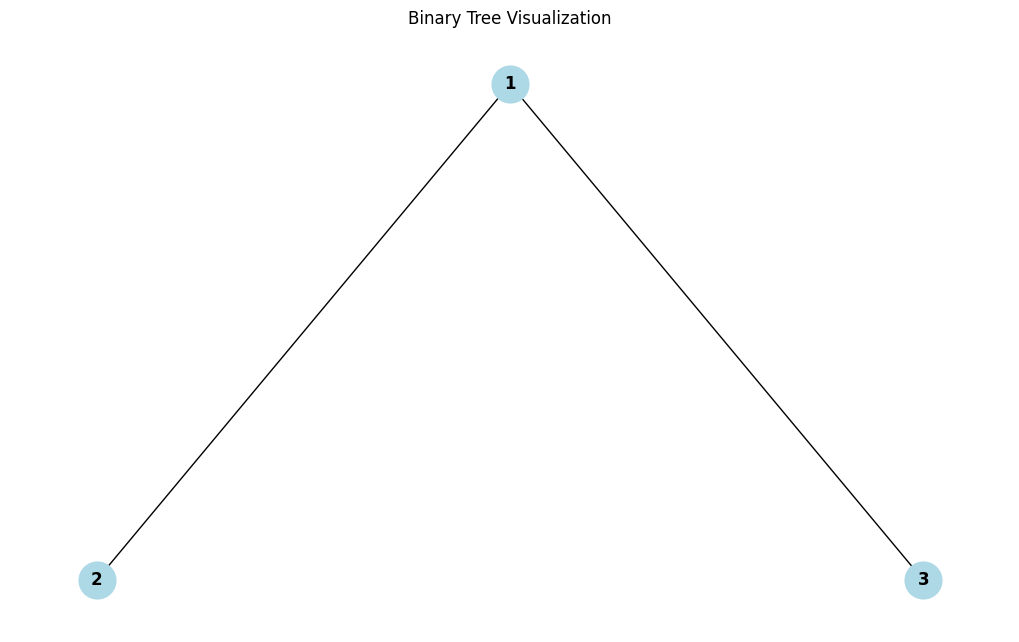

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Define a function to add edges and assign positions recursively for a binary tree
def add_edges_and_positions(graph, node, pos, x=0, y=0, layer_spacing=1.5, sibling_spacing=1.5):
    """Recursively add edges and positions for each node in the tree."""
    if node is not None:
        pos[node.value] = (x, y)  # Set the position of the current node
        if node.left:
            # Position the left child slightly to the left and down
            graph.add_edge(node.value, node.left.value)
            add_edges_and_positions(graph, node.left, pos, x - sibling_spacing / (y + 2), y - layer_spacing, layer_spacing, sibling_spacing)
        if node.right:
            # Position the right child slightly to the right and down
            graph.add_edge(node.value, node.right.value)
            add_edges_and_positions(graph, node.right, pos, x + sibling_spacing / (y + 2), y - layer_spacing, layer_spacing, sibling_spacing)

# Define the TreeNode and BinaryTree classes
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, root):
        self.root = TreeNode(root)

# Create a sample binary tree
bt = BinaryTree(1)
bt.root.left = TreeNode(2)
bt.root.right = TreeNode(3)


# Create a graph, a position dictionary, and add edges with positions
G = nx.DiGraph()
pos = {}  # Dictionary to store positions of each node
add_edges_and_positions(G, bt.root, pos)

# Draw the graph
plt.figure(figsize=(10, 6))  # Adjust figure size for clarity
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=12, font_weight="bold", arrows=False)
plt.title("Binary Tree Visualization")
plt.show()

## Let's now think about non-binary trees

* So far, we've seen the binary property of a Binary Tree (or a Binary Search Tree)

* However, not all trees need this binary property, or to be arranged in sorted order.

* For example, an organisational chart or a file directory can be arranged as a non-binary tree:


In [31]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self, level=0):
        # HELPER METHOD TO PRINT TREE!
        ret = "--->" * level + repr(self.value) + "\n"
        for child in self.children:
            ret += child.__repr__(level+1)
        return ret

    def add_child(self, child_node):
        self.children.append(child_node) 

In [33]:
root = TreeNode("CEO")
root.add_child(TreeNode("VP of Sales"))
root.add_child(TreeNode("VP of R&D"))
root.add_child(TreeNode("VP of Operations"))

In [34]:
root

'CEO'
--->'VP of Sales'
--->'VP of R&D'
--->'VP of Operations'

In [35]:
root = TreeNode("CEO")

level_one_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = level_one_nodes

level_one_nodes[0].children = [TreeNode("Head of Sales Strategy"), 
                               TreeNode("Deputy Head of Sales Strategy")
                               ]

level_one_nodes[1].children = [TreeNode("Head Scientist"), 
                               TreeNode("Deputy Head Scientist"),
                               TreeNode("Director of Research")
                               ]

level_one_nodes[2].children = [TreeNode("Head of Logistics"), 
                               TreeNode("Deputy Head of Logistics"),
                               TreeNode("Director of Operations")
                               ]


In [36]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->--->'Head Scientist'
--->--->'Deputy Head Scientist'
--->--->'Director of Research'
--->'VP of Operations'
--->--->'Head of Logistics'
--->--->'Deputy Head of Logistics'
--->--->'Director of Operations'

## What about Removal (Deletion)? 

* In a linked list, we could remove from mid-list and point to the next one in the sequence: 

![removal_mid_list](https://assets.digitalocean.com/articles/alligator/js/linked-lists-implementation/linked-list-remove.gif)

* But what about our tree branches?

    * Deletion of Leaf nodes

    * Deletion of sub-tree parents - relocate the children?

    * Deletion of the root node - promote a child to be the parent?

![Treesgif](http://www.thecrazyprogrammer.com/wp-content/uploads/2017/08/Tree-Data-Structure.gif)

## Deletion of Leaf nodes

* Easiest as no dependents! 

In [37]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self, level=0):
        # HELPER METHOD TO PRINT TREE!
        ret = "--->" * level + repr(self.value) + "\n"
        for child in self.children:
            ret += child.__repr__(level+1)
        return ret

    def add_child(self, child_node):
        self.children.append(child_node) 
        
    def delete_child(self, child_node):
        self.children.remove(child_node)

In [40]:
root = TreeNode("CEO")

vp_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = vp_nodes

vp_sales_children = [TreeNode("Head of Sales Strategy"), 
                     TreeNode("Deputy Head of Sales Strategy")
                     ]

vp_nodes[0].children = vp_sales_children

In [41]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

In [42]:
vp_nodes[0].delete_child(vp_sales_children[1])

In [43]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

## Deletion of a subtree parent

* do we reallocate the children? 

* or delete them? 

## Method #1 - reallocate the children 

In [46]:
root = TreeNode("CEO")

vp_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = vp_nodes

vp_sales_children = [TreeNode("Head of Sales Strategy"), 
                     TreeNode("Deputy Head of Sales Strategy")
                     ]

vp_nodes[0].children = vp_sales_children

In [47]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

## Manually replace the nodes

* In a BST - this may need to happen automatically 

* In an AVL tree - this would happen automatically!

* But in a non-binary tree - we could set manually according to our own criteria. 

In [48]:
vp_sales_children[0].add_child(vp_sales_children[1]) ## set Deputy-Head to be child of Head of sales
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->--->'Deputy Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

In [49]:
root.children[0] = vp_sales_children[0] # then replace VP of Sales

In [50]:
root

'CEO'
--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

## Method #2 - delete the subtree children along with the parent

In [56]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self, level=0):
        # HELPER METHOD TO PRINT TREE!
        ret = "--->" * level + repr(self.value) + "\n"
        for child in self.children:
            ret += child.__repr__(level+1)
        return ret

    def add_child(self, child_node):
        self.children.append(child_node) 
        
    def delete_child(self, child_node):
        self.children.remove(child_node)
    
    def delete_subtree(self):
        for child in self.children:
            child.delete_subtree()
        self.children = []

In [57]:
root = TreeNode("CEO")

vp_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = vp_nodes

vp_sales_children = [TreeNode("Head of Sales Strategy"), 
                     TreeNode("Deputy Head of Sales Strategy")
                     ]

vp_nodes[0].children = vp_sales_children

In [58]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

In [54]:
vp_nodes[0].delete_subtree() #delete children of vp_nodes[0]
root.delete_child(vp_nodes[0]) #delete vp_nodes[0]

In [55]:
root

'CEO'
--->'VP of R&D'
--->'VP of Operations'

## Deletion of the Root node

* In our heapify algorithm - we swapped the nodes so the max/min element became the root.

* In a Binary Search Tree - you'd need to restructure the tree to maintain the binary search property (left < root < right)

## Method #1 - save the children - reallocate the root

In [59]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self, level=0):
        # HELPER METHOD TO PRINT TREE!
        ret = "--->" * level + repr(self.value) + "\n"
        for child in self.children:
            ret += child.__repr__(level+1)
        return ret

    def add_child(self, child_node):
        self.children.append(child_node) 
        
    def delete_child(self, child_node):
        self.children.remove(child_node)
        

In [60]:
root = TreeNode("CEO")

vp_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = vp_nodes

vp_sales_children = [TreeNode("Head of Sales Strategy"), 
                     TreeNode("Deputy Head of Sales Strategy")
                     ]

vp_nodes[0].children = vp_sales_children

In [61]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

### First half - prepare VP of Sales to be new root - prepare the subtree children

In [62]:
root.children[0]

'VP of Sales'
--->'Head of Sales Strategy'
--->'Deputy Head of Sales Strategy'

In [63]:
root.children[0].children[0].add_child(root.children[0].children[1])

In [64]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->--->'Deputy Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

In [65]:
root.children[0].delete_child(root.children[0].children[1])

In [66]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

### now prepare the remaining level 1 nodes to be children of new root node

In [67]:
root.children[1:3]

['VP of R&D', 'VP of Operations']

In [68]:
root.children[0].add_child(root.children[1])
root.children[0].add_child(root.children[2])

In [69]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->--->'Deputy Head of Sales Strategy'
--->--->'VP of R&D'
--->--->'VP of Operations'
--->'VP of R&D'
--->'VP of Operations'

In [70]:
root.delete_child(root.children[2])
root.delete_child(root.children[1])


In [71]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->--->'Deputy Head of Sales Strategy'
--->--->'VP of R&D'
--->--->'VP of Operations'

### finally - replace root with newly constructed subtree

In [72]:
root = root.children[0]

In [73]:
root

'VP of Sales'
--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

## Method #2 - delete the entire tree

In [74]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.children = []

    def __repr__(self, level=0):
        # HELPER METHOD TO PRINT TREE!
        ret = "--->" * level + repr(self.value) + "\n"
        for child in self.children:
            ret += child.__repr__(level+1)
        return ret

    def add_child(self, child_node):
        self.children.append(child_node) 
        
    def delete_child(self, child_node):
        self.children.remove(child_node)
    
    def delete_subtree(self):
        for child in self.children:
            child.delete_subtree()
        self.children = []
    
    def delete_root(self):
        for child in self.children:
            child.delete_subtree()
        self.children = []
        self.value = []

In [75]:
root = TreeNode("CEO")

vp_nodes = [ 
             TreeNode("VP of Sales"), 
             TreeNode("VP of R&D"), 
             TreeNode("VP of Operations")
             ]

root.children = vp_nodes

vp_sales_children = [TreeNode("Head of Sales Strategy"), 
                     TreeNode("Deputy Head of Sales Strategy")
                     ]

vp_nodes[0].children = vp_sales_children

In [76]:
root

'CEO'
--->'VP of Sales'
--->--->'Head of Sales Strategy'
--->--->'Deputy Head of Sales Strategy'
--->'VP of R&D'
--->'VP of Operations'

In [77]:
root.delete_root()

In [78]:
root

[]

## Alternatives - `anytree`

`pip install anytree`

`python3 -m pip install -U anytree --user`

In [80]:
from anytree import Node, RenderTree

root = Node("root")
child_a = Node("child_a", parent=root)
child_b = Node("child_b", parent=root)
grandchild = Node("grandchild", parent=child_a)

for pre, _, node in RenderTree(root):
    print(f"{pre}{node.name}")

# Output:
# root
# ├── child_a
# │   └── grandchild
# └── child_b

root
├── child_a
│   └── grandchild
└── child_b


# Tree traversal

There are different types of tree traversal: 

* In-Order Traversal (Left, Root, Right):

* Pre-Order (Root, Left, Right)

* Post-Order (Left, Right, Root)


<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Preorder-from-Inorder-and-Postorder-traversals.jpg" alt="tree-traversal" width="650"> 

In [81]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinaryTree:
    def __init__(self, root):
        self.root = TreeNode(root)
        
    def print_in_order(self, node):
        if node:
            self.print_in_order(node.left)
            print(node.value, end=" ")
            self.print_in_order(node.right)
            
    def print_pre_order(self, node):
        if node:
            print(node.value, end=" ")
            self.print_pre_order(node.left)
            self.print_pre_order(node.right)
            
    def print_post_order(self, node):
        if node:
            self.print_post_order(node.left)
            self.print_post_order(node.right)
            print(node.value, end=" ")
            
    def print_level_order(self):
        if not self.root:
            return
        
        queue = [self.root]
        while queue:
            node = queue.pop(0)
            print(node.value, end=" ")
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

In [82]:
bt = BinaryTree(1)
bt.root.left = TreeNode(2)
bt.root.right = TreeNode(3)
bt.root.left.left = TreeNode(4)
bt.root.left.right = TreeNode(5)

## In-Order Traversal (Left, Root, Right):

* This will print nodes in a sorted order if it’s a Binary Search Tree (BST).

In [77]:
def print_in_order(self, node):
    if node:
        self.print_in_order(node.left)
        print(node.value, end=" ")
        self.print_in_order(node.right)

In [78]:
print("In-order Traversal:")
bt.print_in_order(bt.root)  # Output: 4 2 5 1 3

In-order Traversal:
4 2 5 1 3 

## Pre-Order Traversal (Root, Left, Right):

* Useful for copying the tree or checking structure.

In [83]:
def print_pre_order(self, node):
    if node:
        print(node.value, end=" ")
        self.print_pre_order(node.left)
        self.print_pre_order(node.right)

In [84]:
print("\nPre-order Traversal:")
bt.print_pre_order(bt.root)  # Output: 1 2 4 5 3


Pre-order Traversal:
1 2 4 5 3 

## Post-Order Traversal (Left, Right, Root):

* Often used in deletion operations.

In [85]:
def print_post_order(self, node):
    if node:
        self.print_post_order(node.left)
        self.print_post_order(node.right)
        print(node.value, end=" ")

In [86]:
print("\nPost-order Traversal:")
bt.print_post_order(bt.root)  # Output: 4 5 2 3 1


Post-order Traversal:
4 5 2 3 1 

## Level-Order Traversal (Breadth-First):

* This method prints the tree by levels, often using a queue to track nodes at each depth.

* We'll contrast Breadth-First Search (BFS) and Depth-First Search (DFS) in the next lecture.

In [87]:
def print_level_order(self):
    if not self.root:
        return
     
    queue = [self.root]
    while queue:
        node = queue.pop(0)
        print(node.value, end=" ")
        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

In [89]:
print("\nLevel-order Traversal:")
bt.print_level_order()  # Output: 1 2 3 4 5


Level-order Traversal:
1 2 3 4 5 

# Binary Search Tree (BST)

Previously, we looked at the Binary Search algorithm. Remember that this operates on a divide and conquer principle. It will look for the middle of a sorted list. If the item is greater than the mid point, then the first half of the list is disregarded. The algorithm then iterates this process of dividing the list in half and will eventually find the item. 

Binary Search Trees will arrange nodes depending on their value. The root of the BST is regarded to be the mid point. 

* Values lower than the mid point will be added to the left hand side. 

* Values greater than the midpoint are added to the right hand side. 

* This process repeats and items are then arranged in to levels (as can be seen below).

Below is an example of a Binary Search algorithm running on a Tree of nodes alongside an Linear Search algorithm running on an array: 

![BST](https://blog.penjee.com/wp-content/uploads/2015/11/binary-search-tree-sorted-array-animation.gif)

In [90]:
def binary_search(sorted_list, target):
    left_pointer = 0
    right_pointer = len(sorted_list)
  
  # fill in the condition for the while loop
    while left_pointer < right_pointer:
        # calculate the middle index using the two pointers
        mid_idx = (left_pointer + right_pointer) // 2
        mid_val = sorted_list[mid_idx]
        if mid_val == target:
            return mid_idx
        if target < mid_val:
            # set the right_pointer to the appropriate value
            right_pointer = mid_idx
        if target > mid_val:
            # set the left_pointer to the appropriate value
            left_pointer = mid_idx + 1
  
    return "Value not in list"

In [91]:
print(binary_search([1,2,3,4,5], 4))


3


In [92]:
print(binary_search([1,2,3,4,5], 10))

Value not in list


# BST Traversal

In [93]:
class BinarySearchTree:
  def __init__(self, value, depth=1):
    self.value = value
    self.depth = depth
    self.left = None
    self.right = None

  def insert(self, value):
    if (value < self.value):
      if (self.left is None):
        self.left = BinarySearchTree(value, self.depth + 1)
        print(f'Tree node {value} added to the left of {self.value} at depth {self.depth + 1}')
      else:
        self.left.insert(value)
    else:
      if (self.right is None):
        self.right = BinarySearchTree(value, self.depth + 1)
        print(f'Tree node {value} added to the right of {self.value} at depth {self.depth + 1}')
      else:
        self.right.insert(value)
        
  def get_node_by_value(self, value):
    if (self.value == value):
      return self
    elif ((self.left is not None) and (value < self.value)):
      return self.left.get_node_by_value(value)
    elif ((self.right is not None) and (value >= self.value)):
      return self.right.get_node_by_value(value)
    else:
      return None
    
  # Define .depth_first_traversal() below:
  def depth_first_traversal(self):
    if (self.left is not None):
      self.left.depth_first_traversal()
    print(f'Depth={self.depth}, Value={self.value}')
    if (self.right is not None):
      self.right.depth_first_traversal()

In [94]:
tree = BinarySearchTree(48)
tree.insert(24)
tree.insert(55)
tree.insert(26)
tree.insert(38)
tree.insert(56)
tree.insert(74)

# Print depth-first traversal:
tree.depth_first_traversal()

Tree node 24 added to the left of 48 at depth 2
Tree node 55 added to the right of 48 at depth 2
Tree node 26 added to the right of 24 at depth 3
Tree node 38 added to the right of 26 at depth 4
Tree node 56 added to the right of 55 at depth 3
Tree node 74 added to the right of 56 at depth 4
Depth=2, Value=24
Depth=3, Value=26
Depth=4, Value=38
Depth=1, Value=48
Depth=2, Value=55
Depth=3, Value=56
Depth=4, Value=74


In [102]:
import random
print("Creating Binary Search Tree rooted at value 15:")
tree = BinarySearchTree(15)

for x in range(10):
  tree.insert(random.randint(0, 100))
  
print("Printing the inorder depth-first traversal:")
tree.depth_first_traversal()

Creating Binary Search Tree rooted at value 15:
Tree node 81 added to the right of 15 at depth 2
Tree node 58 added to the left of 81 at depth 3
Tree node 1 added to the left of 15 at depth 2
Tree node 97 added to the right of 81 at depth 3
Tree node 30 added to the left of 58 at depth 4
Tree node 37 added to the right of 30 at depth 5
Tree node 99 added to the right of 97 at depth 4
Tree node 80 added to the right of 58 at depth 4
Tree node 20 added to the left of 30 at depth 5
Tree node 74 added to the left of 80 at depth 5
Printing the inorder depth-first traversal:
Depth=2, Value=1
Depth=1, Value=15
Depth=5, Value=20
Depth=4, Value=30
Depth=5, Value=37
Depth=3, Value=58
Depth=5, Value=74
Depth=4, Value=80
Depth=2, Value=81
Depth=3, Value=97
Depth=4, Value=99


# Another example of BST Implementation

In [103]:
class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [105]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        
    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)
                
    def in_order_traversal(self):
        self._in_order_recursive(self.root)
        print()  # New line after traversal

    def _in_order_recursive(self, node):
        if node:
            self._in_order_recursive(node.left)
            print(node.value, end=" ")
            self._in_order_recursive(node.right)
            
    def search(self, value):
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        if node is None:
            return False
        if node.value == value:
            return True
        elif value < node.value:
            return self._search_recursive(node.left, value)
        else:
            return self._search_recursive(node.right, value)

In [106]:
bst = BinarySearchTree()
bst.insert(50)
bst.insert(30)
bst.insert(70)
bst.insert(20)
bst.insert(40)
bst.insert(60)
bst.insert(80)

In [107]:
print("In-order Traversal:")
bst.in_order_traversal()  # Output: 20 30 40 50 60 70 80

In-order Traversal:
20 30 40 50 60 70 80 


## Binary Search: 

In [108]:
def search(self, value):
    return self._search_recursive(self.root, value)

def _search_recursive(self, node, value):
    if node is None:
        return False
    if node.value == value:
        return True
    elif value < node.value:
        return self._search_recursive(node.left, value)
    else:
        return self._search_recursive(node.right, value)

In [109]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        
    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)
                
    def in_order_traversal(self):
        self._in_order_recursive(self.root)
        print()  # New line after traversal

    def _in_order_recursive(self, node):
        if node:
            self._in_order_recursive(node.left)
            print(node.value, end=" ")
            self._in_order_recursive(node.right)
            
    def search(self, value):
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        if node is None:
            return False
        if node.value == value:
            return True
        elif value < node.value:
            return self._search_recursive(node.left, value)
        else:
            return self._search_recursive(node.right, value)

In [110]:
bst = BinarySearchTree()
bst.insert(50)
bst.insert(30)
bst.insert(70)
bst.insert(20)
bst.insert(40)
bst.insert(60)
bst.insert(80)

In [111]:
print("Search for 40:", bst.search(40))  # Output: True
print("Search for 25:", bst.search(25))  # Output: False

Search for 40: True
Search for 25: False


## Deletion in a BST: 

* Deletion of leaf nodes

* Deletion of sub-tree parents

* Deletion of root

![swap_delete_bst](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiTKq3yaLOX0BoKHkfV6hXySbYXodGu3HMY823mBJE2Gv_23CmeV7NSNE2yAOEfShsZrzcDziEEQGuJSLly_0CRTb2ejqfJdW7VB1ij_0bUqju_fPPJArv5D7ROsPYodDc1Y2ktdoPTqmMs/s320-rw/delete_bst.gif)

In [112]:
def delete(self, value):
    self.root = self._delete_recursive(self.root, value)

def _delete_recursive(self, node, value):
    if node is None:
        return node
    if value < node.value:
        node.left = self._delete_recursive(node.left, value)
    elif value > node.value:
        node.right = self._delete_recursive(node.right, value)
    else:
        # Node with only one child or no child
        if node.left is None:
            return node.right
        elif node.right is None:
            return node.left

        # Node with two children: get the in-order successor
        min_larger_node = self._min_value_node(node.right)
        node.value = min_larger_node.value
        node.right = self._delete_recursive(node.right, min_larger_node.value)

    return node

def _min_value_node(self, node):
    current = node
    while current.left is not None:
        current = current.left
    return current

In [113]:
class BinarySearchTree:
    def __init__(self):
        self.root = None
        
    def insert(self, value):
        if self.root is None:
            self.root = TreeNode(value)
        else:
            self._insert_recursive(self.root, value)

    def _insert_recursive(self, node, value):
        if value < node.value:
            if node.left is None:
                node.left = TreeNode(value)
            else:
                self._insert_recursive(node.left, value)
        elif value > node.value:
            if node.right is None:
                node.right = TreeNode(value)
            else:
                self._insert_recursive(node.right, value)
                
    def in_order_traversal(self):
        self._in_order_recursive(self.root)
        print()  # New line after traversal

    def _in_order_recursive(self, node):
        if node:
            self._in_order_recursive(node.left)
            print(node.value, end=" ")
            self._in_order_recursive(node.right)
            
    def search(self, value):
        return self._search_recursive(self.root, value)

    def _search_recursive(self, node, value):
        if node is None:
            return False
        if node.value == value:
            return True
        elif value < node.value:
            return self._search_recursive(node.left, value)
        else:
            return self._search_recursive(node.right, value)
    
    def delete(self, value):
        self.root = self._delete_recursive(self.root, value)

    def _delete_recursive(self, node, value):
        if node is None:
            return node
        if value < node.value:
            node.left = self._delete_recursive(node.left, value)
        elif value > node.value:
            node.right = self._delete_recursive(node.right, value)
        else:
            # Node with only one child or no child
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left

            # Node with two children: get the in-order successor
            min_larger_node = self._min_value_node(node.right)
            node.value = min_larger_node.value
            node.right = self._delete_recursive(node.right, min_larger_node.value)

        return node

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

In [114]:
bst = BinarySearchTree()
bst.insert(50)
bst.insert(30)
bst.insert(70)
bst.insert(20)
bst.insert(40)
bst.insert(60)
bst.insert(80)

In [116]:
bst.delete(70)
print("In-order Traversal after deleting 70:")
bst.in_order_traversal()  # Output: 20 30 40 50 60 80

In-order Traversal after deleting 70:
20 30 40 50 60 80 


## Further Reading

If interested in Trees, then BSTs are one of many arrangements of Trees. 


Other popular arrangements are: 

## AVL Trees 
Named after the programmers Georgy <b>Adelson-Velsky</b> and Evgenii <b>Landis</b> in 1962, the AVL tree is a self-correcting and balancing tree.

![AVLtree](https://upload.wikimedia.org/wikipedia/commons/f/fd/AVL_Tree_Example.gif)

## Red-Black Trees 

Invented by Rudolph Bayer in 1972, Red-Black Trees are a form of self-balancing tree but store additional colour information (which could be compressed to a 'bit' - 0 or 1 - to reduce memory overhead) which aids the re-balancing of the tree. Null pointers (None in Python) are also stored.

Red-Black Trees maintain a balanced structure with a guaranteed maximum height of O(log n), where 'n' is the number of nodes in the tree. This balanced structure ensures efficient search and insertion operations in the tree.

Rules: 
* Root must be black.
* New nodes start as red. 
* Red nodes cannot have red children (they must be black). 
* Self-balancing (like AVL)

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Red-black_tree_example_with_NIL.svg" alt="natural_tree" width="850"> 


![RBTreesgif](https://miro.medium.com/v2/resize:fit:1200/1*UyredRrTNZ-XJwa0uUfoTA.gif)


## Decision Trees in data analysis and AI applications

The Tree structure can also be applied for decision making within AI applications.

<img src="https://venngage-wordpress.s3.amazonaws.com/uploads/2019/08/what-is-a-decision-tree-5.png" alt="natural_tree" width="650"> 



## Parse trees for Natural Language Processing 


![Con_NLP](https://upload.wikimedia.org/wikipedia/commons/5/54/Parse_tree_1.jpg)

![Dep_NLP](https://upload.wikimedia.org/wikipedia/commons/8/8c/Parse2.jpg)


## Summary 

* Tree - layers/levels linked together (any number of children)

* Binary Tree - maximum two children - we used these for representing Heaps.

* Binary Search Tree - logarithmic search $O(log$ $n)$

* AVL Tree - self balancing BST - re-arranges itself as new items are added and removed. 

## Exercise 

Implement the `BinarySearchTree` class below, which contains a `root` node attribute, an `insert()` and `print_inorder()` method. 

For the `insert()` method, remember ther rules for a BST: 
    
* values less than the parent, are assigned on the left
    
* values greater than the parent, are assigned on the right

For the `print_inorder()`, ensure that you print the values in order from lowest to highest. 

To test this, `insert` a few integers (e.g. five to eight values) and then call `print_inorder` method to ensure that these have printed correctly. 

Extension: Can you code your `BinarySearchTree` to work with letters? Can it arrange letters A-Z (and also think about a-z). Hint: use the `ord()` function we looked at with ASCII and hashing!

Extension: Now work with strings! How will you arrange when you have words that start with the same letter? E.g. 'queue' and 'queen'?

In [ ]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left_child = None
        self.right_child = None
    
    def assign_left_child(self):
        ...
        
    def assign_right_child(self):
        ...

In [ ]:
class BinarySearchTree: 
    def __init__(self, root_value):
        self.root = TreeNode(root_value)
        
    def insert(self):
        ...

    def print_inorder(self):
        ...

In [ ]:
# Complete the BinarySearchTree and TreeNode classes above and instantiate it here

bst = BinarySearchTree()
...

## Exercise 

Now randomly generate 50 integers, between the range of 1-100, storing these in a Python `list`. 

Write a function which will `insert` the values from a list passed in (the one you just created) into a new instance of your `BinarySearchTree` class. 

Again, call the `print_inorder` method to ensure these values have been arranged correctly, following the rules of a BST. 

In [ ]:
# Write your solution here.

## Exercise 

Implement a `find()` method in your `BinarySearchTree` class which will locate a node by-value. Follow the logic of the `binary_search` algorithm here.

Are there both recursive and iterative approaches to achieve this? What are the performance differences?

In [ ]:
# Implement your find/binary_search algorithm in your BinarySearchTree class


## Exercise 

Compare Linear (sequential search) against Binary Search. Test these on a variety of array lengths. 

Question: What is the run time of Binary Search? 

In [ ]:
# Write your solution here. 

## Exercise 

Now implement a `remove()` method for your `BinarySearchTree`. Code this to remove any node from any level in a BST. Consider all possible cases: removal of the root node, removal of a leaf node, and removal of a node in a middle layer of the BST. 

Hint: start with the removing a leaf node - this is easiest as it has no dependencies to re-arrange.

In [ ]:
# Implement your remove method in your BinarySearchTree class


## Exercise 

Write a function which will position the nodes of a Binary Search Tree (BST) in an array. This is the reverse of a previous exercise which went from array to BST, and similar to how a Binary Tree can be represented as a heap (array).

Question: What is the difference between a Binary Tree and Binary Search Tree? 

In [ ]:
# Write your solution here.


## Exercise

You've written `print_inorder()` in a previous exercise. Now can you implement methods for `print_preorder()` and `print_postorder()`

Reminder: 
* <b>In-order traversal</b> visits nodes in the left subtree, then the root node, and finally nodes in the right subtree. 

* <b>Pre-order traversal</b> visits the root node first, then nodes in the left subtree, and finally nodes in the right subtree.

* <b>Post-order traversal</b> visits nodes in the left subtree first, then nodes in the right subtree, and finally the root node.


In [ ]:
# Implement your pre-order and post-order traversal methods in your BinarySearchTree class


## Exercise - File Directory Tree

Represent a file directory of folders and the files they contain, as a tree.

Implement the appropriate traversal (print) method to maintain the structure of the file directory

Feel free to make up the directory (or use your file directory), but here's an example : 
```
   /usr
       /nick
           /Documents
               /Teaching Materials
               /Research
               /GitHub
                   /C++
                   /Python
                   /Java
               
```


In [ ]:
# Write your solution here.

## Exercise 

Rather than printing out a vertical list of the tree nodes, can you print in the BST nodes in the arrangement shown in diagrams shown in this lecture? Are you able to format the print out of tree elements to look something like the below which shows the nodes and their edges:

```
         D
       /   \ 
      C     F
           / \
          E   G
```

Hint: If you're finding the text display too difficult, adapt the `networkx` code we used for `08 Heaps`


In [ ]:
def display_tree():
    ...

In [ ]:
display_tree()

## Exercise - AVL Tree

Can you now extend your BST to balance itself when new nodes are added (or deleted). The idea is to maintain the rules of a BST (left < root, right > root) but to strive for symmetry where new inserts (or deletions) make the tree too 'one-sided'. 

This was popularised by George Adelson-Velsky and Evgenii Landis - known as an AVL tree.

To break this problem down into manageable steps, focus on testing left rotations and right rotations. I'm happy for you to use either digits or letters as values sorted and arranged.If you can get this working for insertions, check that the tree also re-balances itself for when you delete a given node from a tree.

![AVLtree](https://upload.wikimedia.org/wikipedia/commons/f/fd/AVL_Tree_Example.gif)

In [ ]:
# Write your solution here or in an AVL Tree class. 
